# Download dataset

In [107]:
import wget
import os
import shutil
import zipfile

if not os.path.exists('../data/osfstorage-archive.zip'):
    wget.download('https://files.de-1.osf.io/v1/resources/2395t/providers/osfstorage/?zip=')

if not os.path.exists('../data'):
    os.mkdir('../data')

if os.path.exists('osfstorage-archive.zip'):
    shutil.move('osfstorage-archive.zip','../data/osfstorage-archive.zip')

with zipfile.ZipFile('../data/osfstorage-archive.zip', 'r') as zip_ref:
    zip_ref.extractall('../data')

-1 / unknown

# Load dataset

In [101]:
import mat73
import numpy as np
all_data = {}

#No stimulation
data = mat73.loadmat('./data/WT_NoStim.mat')
dataset = 'WT_NoStim'
traces = data[dataset]['deltaFOverF_bc'] #neural activity traces corrected for bleaching
IDs = data[dataset]['NeuronNames'] #neuron IDs
#t = data[dataset]['timeVectorSeconds'] #seconds
fps = data[dataset]['fps'] #fps
states_raw = data[dataset]['States']

states=[]
for i, tr in enumerate(traces):
    states.append(np.zeros(len(tr)))
    for j, s in enumerate(states_raw[i].keys()):
        states[-1] += states_raw[i][s]*j
    states[-1] = states[-1].astype(int)

n=len(traces)

#‘FWD’ forward crawling 
#‘SLOW’ forward slowing
#‘DT’ dorsal post reversal turn
#‘VT’ ventral post reversal turn
#‘REV1’ reverse crawling
#‘REV2’ reverse crawling
#‘REVSUS’ sustained reverse crawling
#‘NOSTATE’ - ambiguous

In [112]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
traces_pca = pca.fit_transform(traces[1])

<Axes3DSubplot:>

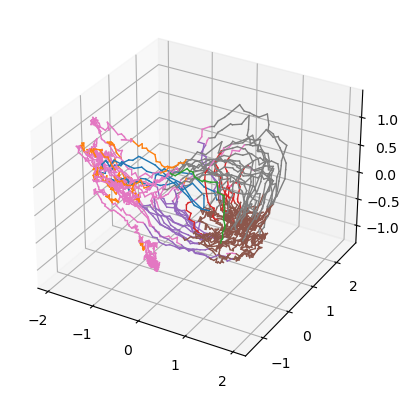

In [113]:
from MARBLE import plotting
plotting.trajectories(traces_pca, style='-', node_feature=states[1])